# Recognizing hand-written digits

Основано на <a href="http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html">этом</a>.

In [1]:
# импортируем необходимые библиотеки
from sklearn import datasets, svm, metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
# список массивов - изображения наших цифр
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [4]:
# метки классов
digits.target

array([0, 1, 2, ..., 8, 9, 8])

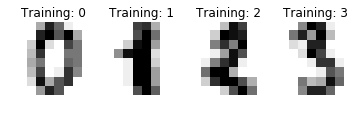

In [5]:
# визуализируем примеры изображений

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [6]:
# для того, чтобы применить к данным классификатор преобразуем матрицы
# изображений в вектора и составим из них матрицу data
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
from sklearn.grid_search import GridSearchCV

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()

In [10]:
parameters = {'C': (0.01, 0.1, 1, 10),
              'penalty': ('l1', 'l2')}

In [11]:
gs_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(data, digits.target)

In [12]:
gs_clf.grid_scores_

[mean: 0.90317, std: 0.02580, params: {'penalty': 'l1', 'C': 0.01},
 mean: 0.92877, std: 0.02671, params: {'penalty': 'l2', 'C': 0.01},
 mean: 0.93211, std: 0.02274, params: {'penalty': 'l1', 'C': 0.1},
 mean: 0.92432, std: 0.03190, params: {'penalty': 'l2', 'C': 0.1},
 mean: 0.92877, std: 0.02705, params: {'penalty': 'l1', 'C': 1},
 mean: 0.92098, std: 0.03025, params: {'penalty': 'l2', 'C': 1},
 mean: 0.91875, std: 0.02814, params: {'penalty': 'l1', 'C': 10},
 mean: 0.91764, std: 0.02813, params: {'penalty': 'l2', 'C': 10}]

In [13]:
gs_clf.best_score_

0.93210907067334448

In [14]:
for key, value in gs_clf.best_params_.items():
    print('%s: %s' % (key, value))

penalty: l1
C: 0.1


## SVM

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC()

In [17]:
parameters = {'C': (0.01, 0.1, 1, 10),
              'kernel': ('linear', 'rbf', 'sigmoid')
}

In [18]:
gs_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(data, digits.target)

In [19]:
gs_clf.grid_scores_

[mean: 0.95103, std: 0.02060, params: {'kernel': 'linear', 'C': 0.01},
 mean: 0.11130, std: 0.01956, params: {'kernel': 'rbf', 'C': 0.01},
 mean: 0.10128, std: 0.00067, params: {'kernel': 'sigmoid', 'C': 0.01},
 mean: 0.94936, std: 0.01911, params: {'kernel': 'linear', 'C': 0.1},
 mean: 0.11130, std: 0.01956, params: {'kernel': 'rbf', 'C': 0.1},
 mean: 0.10128, std: 0.00067, params: {'kernel': 'sigmoid', 'C': 0.1},
 mean: 0.94936, std: 0.01911, params: {'kernel': 'linear', 'C': 1},
 mean: 0.44853, std: 0.03721, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.10128, std: 0.00067, params: {'kernel': 'sigmoid', 'C': 1},
 mean: 0.94936, std: 0.01911, params: {'kernel': 'linear', 'C': 10},
 mean: 0.47301, std: 0.03222, params: {'kernel': 'rbf', 'C': 10},
 mean: 0.10128, std: 0.00067, params: {'kernel': 'sigmoid', 'C': 10}]

In [20]:
gs_clf.best_score_

0.9510294936004452

In [21]:
for key, value in gs_clf.best_params_.items():
    print('%s: %s' % (key, value))

kernel: linear
C: 0.01
